In [2]:
from gym import utils
import numpy as np
#import mdptoolbox.example
import hiive.mdptoolbox.example as example
import hiive.mdptoolbox.mdp as mdp
#import hiive.mdptoolbox, hiive.mdptoolbox.example
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
import gym # loading the Gym library
 
env = gym.make("FrozenLake-v0")
env.reset()                    
env.render()


SFFF
FHFH
FFFH
HFFG


In [4]:
print("Action space: ", env.action_space)
print("Observation space: ", env.observation_space)

Action space:  Discrete(4)
Observation space:  Discrete(16)


In [5]:
env.step(1)

(4, 0.0, False, {'prob': 0.3333333333333333})

In [6]:
import gym
 
MAX_ITERATIONS = 10
 
env = gym.make("FrozenLake-v0")
env.reset()
env.render()
new_state = 0
for i in range(100):
    #print(i)
    random_action = env.action_space.sample()
    #random_action = vi.policy[new_state]
    #print(random_action)
    new_state, reward, done, info = env.step(
       random_action)
    #print(info['prob'])
    env.render()
    if done:
        break


SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG


In [7]:
nstates = env.env.nS
nactions = env.env.nA

In [8]:
P = [[[0.0]*nstates]*nstates]*nactions
P = np.array(P)

In [9]:
gym_p = env.env.P

In [10]:
P = [[[0.0]*nstates]*nstates]*nactions
P = np.array(P)
rewards = []#set()
for k in gym_p.keys():
    for a in gym_p[k].keys():
        addornot = False
        for i in range(len(gym_p[k][a])):
            to_info = gym_p[k][a][i]
            #print(P[a][k][to_info[1]])
            P[a][k][to_info[1]] += to_info[0]
            #R[k][a] = max(R[k][a],to_info[2])
            addornot = addornot or to_info[3]
            #print(addornot,k)
        if addornot:
                #rewards.add((k,to_info[1],to_info[2]))
                rewards.append([k,a]+gym_p[k][a])
            
            
    

In [11]:
P = [[[0.0]*nstates]*nstates]*nactions
P = np.array(P)
rewards = []#set()
for k in gym_p.keys():
    for a in gym_p[k].keys():
        addornot = False
        for i in range(len(gym_p[k][a])):
            to_info = gym_p[k][a][i]
            #print(P[a][k][to_info[1]])
            P[a][k][to_info[1]] += to_info[0]
            #R[k][a] = max(R[k][a],to_info[2])
            addornot = addornot or to_info[3]
            #print(addornot,k)
        if addornot:
                #rewards.add((k,to_info[1],to_info[2]))
                rewards.append([k,a]+gym_p[k][a])
            
            
    

In [12]:
gym_p[0][0]

[(0.3333333333333333, 0, 0.0, False),
 (0.3333333333333333, 0, 0.0, False),
 (0.3333333333333333, 4, 0.0, False)]

In [13]:
rewards

[[1,
  0,
  (0.3333333333333333, 1, 0.0, False),
  (0.3333333333333333, 0, 0.0, False),
  (0.3333333333333333, 5, 0.0, True)],
 [1,
  1,
  (0.3333333333333333, 0, 0.0, False),
  (0.3333333333333333, 5, 0.0, True),
  (0.3333333333333333, 2, 0.0, False)],
 [1,
  2,
  (0.3333333333333333, 5, 0.0, True),
  (0.3333333333333333, 2, 0.0, False),
  (0.3333333333333333, 1, 0.0, False)],
 [3,
  0,
  (0.3333333333333333, 3, 0.0, False),
  (0.3333333333333333, 2, 0.0, False),
  (0.3333333333333333, 7, 0.0, True)],
 [3,
  1,
  (0.3333333333333333, 2, 0.0, False),
  (0.3333333333333333, 7, 0.0, True),
  (0.3333333333333333, 3, 0.0, False)],
 [3,
  2,
  (0.3333333333333333, 7, 0.0, True),
  (0.3333333333333333, 3, 0.0, False),
  (0.3333333333333333, 3, 0.0, False)],
 [4,
  1,
  (0.3333333333333333, 4, 0.0, False),
  (0.3333333333333333, 8, 0.0, False),
  (0.3333333333333333, 5, 0.0, True)],
 [4,
  2,
  (0.3333333333333333, 8, 0.0, False),
  (0.3333333333333333, 5, 0.0, True),
  (0.3333333333333333, 0

In [14]:
re=[1000.0,-100.0,-1.0]
re = [1.0,0.0,0.0]
rtable = [[re[-1]]*env.env.nA]*env.env.nS
rtable = np.array(rtable)

for r in rewards:
    im_re = 0
    for i in range(2,len(r)):
        value = re[0] if r[i][3] and r[i][2]>0 else re[1] if r[i][3]>0 and r[i][2]==0 else re[2]
        #print(value)
        im_re += r[i][0]*value
    #print(im_re)
    rtable[r[0]][r[1]] = im_re
    #print(rtable)
    

In [15]:
gym_p[1]

{0: [(0.3333333333333333, 1, 0.0, False),
  (0.3333333333333333, 0, 0.0, False),
  (0.3333333333333333, 5, 0.0, True)],
 1: [(0.3333333333333333, 0, 0.0, False),
  (0.3333333333333333, 5, 0.0, True),
  (0.3333333333333333, 2, 0.0, False)],
 2: [(0.3333333333333333, 5, 0.0, True),
  (0.3333333333333333, 2, 0.0, False),
  (0.3333333333333333, 1, 0.0, False)],
 3: [(0.3333333333333333, 2, 0.0, False),
  (0.3333333333333333, 1, 0.0, False),
  (0.3333333333333333, 0, 0.0, False)]}

In [16]:
index_action_dic = {1:2,-1:0,env.env.nS**0.5:1,-env.env.nS**0.5:3,0:-1}

In [17]:
P = [[[0.0]*nstates]*nstates]*nactions
P = np.array(P)
rewards = []#set()
for k in gym_p.keys():
    for a in gym_p[k].keys():
        addornot = False
        for i in range(len(gym_p[k][a])):
            to_info = gym_p[k][a][i]
            #print(P[a][k][to_info[1]])
            P[a][k][to_info[1]] += to_info[0]
            #R[k][a] = max(R[k][a],to_info[2])
            addornot = addornot or to_info[3]
            #print(addornot,k)
        if addornot:
                #rewards.add((k,to_info[1],to_info[2]))
                rewards.append([k,a]+gym_p[k][a])
            
            
    

In [18]:
def get_PR(gym_p,env,re=[1000,-100]):
    P = [[[0.0]*nstates]*nstates]*nactions
    P = np.array(P)
    rewards = set()
    for k in gym_p.keys():
        for a in gym_p[k].keys():
            for i in range(len(gym_p[k][a])):
                to_info = gym_p[k][a][i]
                #print(P[a][k][to_info[1]])
                P[a][k][to_info[1]] += to_info[0]
                #R[k][a] = max(R[k][a],to_info[2])
                if to_info[3]:
                    rewards.add((k,to_info[1],to_info[2]))
            
    index_action_dic = {1:2,-1:0,env.env.nS**0.5:1,-env.env.nS**0.5:3,0:-1}
    R = [[0.0]*nactions]*nstates
    R = np.array(R)
    #R[14][2]=1
    #R[11][1]=1
    for r in rewards:
        #print(r)
        move = r[1] - r[0]
        loc = index_action_dic[move]
        #print(move,loc)
        if loc >= 0:
            if r[2]>0:
                R[r[0]][loc] = re[0]
            else:
                R[r[0]][loc] = re[1]
    return P,R

In [19]:
def get_PR(gym_p,env,re=[1000,-100,-1]):
    P = [[[0.0]*nstates]*nstates]*nactions
    P = np.array(P)
    rewards = []
    for k in gym_p.keys():
        for a in gym_p[k].keys():
            addornot = False

            for i in range(len(gym_p[k][a])):
                to_info = gym_p[k][a][i]
                #print(P[a][k][to_info[1]])
                P[a][k][to_info[1]] += to_info[0]
                #R[k][a] = max(R[k][a],to_info[2])
                addornot = addornot or to_info[3]
            if addornot:
                rewards.append([k,a]+gym_p[k][a])
            
            
    index_action_dic = {1:2,-1:0,env.env.nS**0.5:1,-env.env.nS**0.5:3,0:-1}
    R = [[0.0]*nactions]*nstates
    R = np.array(R)
    for r in rewards:
        im_re = 0
        for i in range(2,len(r)):
            value = re[0] if r[i][3] and r[i][2]>0 else re[1] if r[i][3] and r[i][2]==0 else re[2]
            #print(value)
            im_re += r[i][0]*value
        #print(im_re)
        R[r[0]][r[1]] = im_re
    R[-1] = [0.0]*4
    R[np.where(R==re[1])] = 0.0
    #print(np.where(R==re[1]))
    return P,R

In [20]:
pp,rr = get_PR(gym_p,env,[10,-5,-1])

In [ ]:
R[1][1] = -1
R[3][1] = -1
R[4][2] = -1
R[6][0] = -1
R[6][2] = -1
R[8][1] = -1
R[5]

In [ ]:
R = [[0.0]*nactions]*nstates
R = np.array(R)
R[14][2]=1
R[11][1]=1

## vi

In [41]:
#vi = mdp.ValueIteration(P, R, 0.96)

NameError: name 'R' is not defined

In [21]:
vi = mdp.ValueIteration(pp,rr,0.96)

In [22]:
result = vi.run()

In [23]:
errors = [i['Error'] for i in result]

In [24]:
vi_re = [i['Reward'] for i in result]

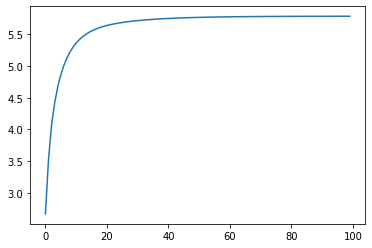

In [25]:
plt.plot(vi_re)

In [26]:
result[-1]

{'State': None,
 'Action': None,
 'Reward': 5.786327346066645,
 'Error': 0.0004028951308508999,
 'Time': 0.012003421783447266,
 'Max V': 5.786327346066645,
 'Mean V': 1.3210607848264844,
 'Iteration': 100}

In [27]:
def vi_plot(result):
    #vi = mdp.ValueIteration(pp,rr,0.96)
    #result = mol.run()
    errors = [i['Error'] for i in result]
    vi_re = [i['Reward'] for i in result]
    mean_re = [i['Mean V'] for i in result]
    ax1 = plt.subplot(131)
    plt.plot(errors)
    #plt.setp(ax1.get_xticklabels(), fontsize=6)
    ax1.set_title('error')
    # share x only
    ax2 = plt.subplot(132)
    plt.plot(vi_re)
    # make these tick labels invisible
    #plt.setp(ax2.get_xticklabels(), visible=False)
    ax2.set_title('rewards')
    ax3 = plt.subplot(133)
    plt.plot(mean_re)
    # make these tick labels invisible
    #plt.setp(ax2.get_xticklabels(), visible=False)
    ax3.set_title('Mean V')
    
    plt.plot()
    #plt.title('MDP result')
    return result,errors,vi_re

(0, 3, 3, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0)
103


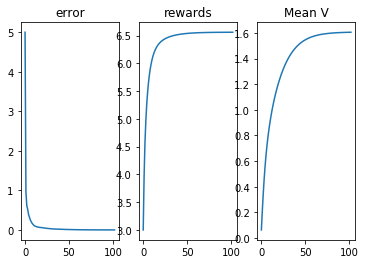

In [28]:
re = [10,-5,-0.5]

pp,rr = get_PR(gym_p,env,re)
vi = mdp.ValueIteration(pp,rr,0.96)
pi = mdp.PolicyIteration(pp, rr, 0.9)
result = vi.run()
final_results,errors,final_rewards = vi_plot(result)
print(vi.policy)
print(len(final_results))

(0, 3, 0, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0)
127


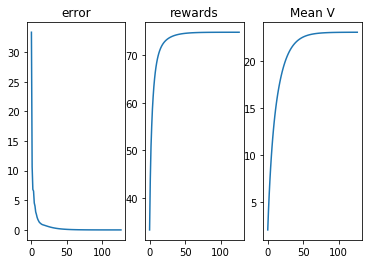

In [52]:
re = [100,-0,-0]

pp,rr = get_PR(gym_p,env,re)
vi = mdp.ValueIteration(pp,rr,0.96)
pi = mdp.PolicyIteration(pp, rr, 0.9)
result = vi.run()
final_results,errors,final_rewards = vi_plot(result)
print(vi.policy)
print(len(final_results))

Text(0.5, 1.0, 'Gamma vs Iteration')

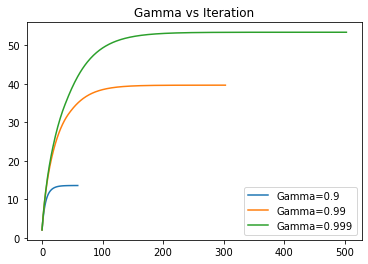

In [71]:
re = [100,-0,-0]
gamma = [0.9,0.99,0.999]
pp,rr = get_PR(gym_p,env,re)
results =[]
for g in gamma:
    vi = mdp.ValueIteration(pp,rr,g)
    
    result = vi.run()
    results.append([i['Mean V'] for i in result])
    plt.plot([i['Mean V'] for i in result],label='Gamma='+str(g))
#pd.DataFrame(result)
plt.legend()
plt.title('Gamma vs Iteration')

Text(0.5, 1.0, 'Gamma vs Iteration')

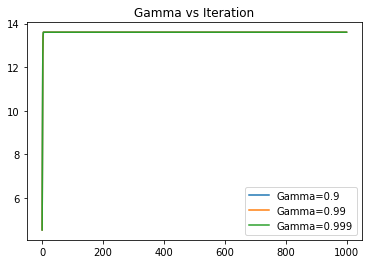

In [69]:
re = [100,-0,-0]
gamma = [0.9,0.99,0.999]
pp,rr = get_PR(gym_p,env,re)
results =[]
for g in gamma:
    vi = mdp.ValueIteration(pp,rr,g)
    pi = mdp.PolicyIteration(pp, rr, 0.9)

    result = pi.run()
    results.append([i['Mean V'] for i in result])
    plt.plot([i['Mean V'] for i in result],label='Gamma='+str(g))
#pd.DataFrame(result)
plt.legend()
plt.title('Gamma vs Iteration')

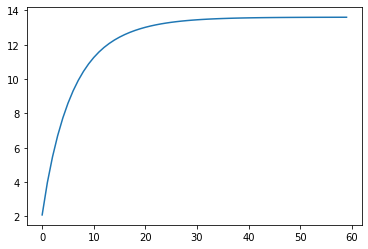

In [76]:
plt.plot(results[0],label=1)

In [ ]:
re = [100,-5,-0.5]

pp,rr = get_PR(gym_p,env,re)
vi = mdp.ValueIteration(pp,rr,0.96)
#vi.setVerbose()
#pi = mdp.PolicyIteration(pp, rr, 0.9)
final_results,errors,final_rewards = vi_plot(vi)
print(vi.policy)
print(len(final_results))

(0, 3, 3, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0)
1030


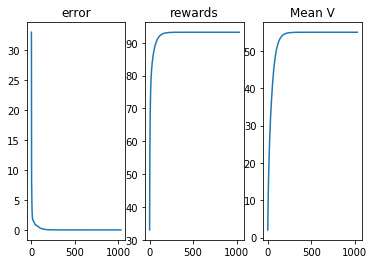

In [126]:
re = [100,-.5,-0.5]

pp,rr = get_PR(gym_p,env,re)
vi = mdp.ValueIteration(pp,rr,0.999999996)
#vi.setVerbose()
#pi = mdp.PolicyIteration(pp, rr, 0.9)
viresult = vi.run()
final_results,errors,final_rewards = vi_plot(viresult)
print(vi.policy)
print(len(final_results))

In [ ]:
re = [10,-5,-0.5]

pp,rr = get_PR(gym_p,env,re)
vi = mdp.ValueIteration(pp,rr,0.96)
pi = mdp.PolicyIteration(pp, rr, 0.9)
final_results,errors,final_rewards = vi_plot(vi)
print(vi.policy)
print(len(final_results))

 Iteration   Variation
         1           7
         2           5
         3           3
         4           2
         5           3
         6           1
         7           0
Iterating stopped, unchanging policy found.
(0, 3, 0, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0)


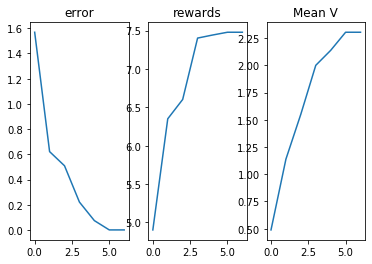

In [31]:
re = [100,-5,0.5]
re = [10,0,0]
#re = [10,-5,-0.5]

pp,rr = get_PR(gym_p,env,re)

pi = mdp.PolicyIteration(pp, rr, 0.96)
pi.setVerbose()
pi_result = pi.run()
final_results,errors,final_rewards = vi_plot(pi_result)
print(pi.policy)

In [38]:
result[0]

{'State': None,
 'Action': None,
 'Reward': 3.0,
 'Error': 5.0,
 'Time': 0.0,
 'Max V': 3.0,
 'Mean V': 0.0625,
 'Iteration': 1}

In [86]:
vi_meanv = [i['Mean V'] for i in result]
pi_meanv = [i['Mean V'] for i in pi_result]
vi_error = [i['Error'] for i in result]
pi_error = [i['Error'] for i in pi_result]
vi_time = [i['Time'] for i in result]
pi_time = [i['Time'] for i in pi_result]

Text(0.5, 1.0, 'VI, PI Delta convergence Plot')

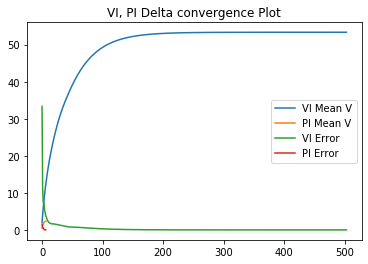

In [89]:
plt.plot(vi_meanv,label = 'VI Mean V')
plt.plot(pi_meanv,label = 'PI Mean V')
plt.plot(vi_error,label = 'VI Error')
plt.plot(pi_error,label = 'PI Error')
plt.plot()
plt.legend(loc='best')
plt.title('VI, PI Delta convergence Plot')

In [90]:
pi_time

[0.0009968280792236328,
 0.0029990673065185547,
 0.004000663757324219,
 0.0060002803802490234,
 0.006999492645263672,
 0.00799703598022461,
 0.008999109268188477]

Text(0.5, 1.0, 'VI Mean V vs time')

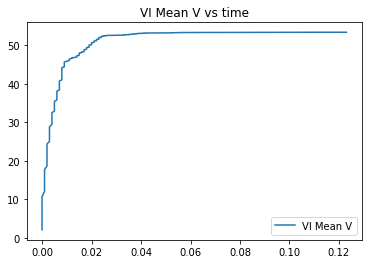

In [92]:
plt.plot(vi_time,vi_meanv,label = 'VI Mean V')
#plt.plot(pi_time,pi_meanv,label = 'PI Mean V')
# plt.plot(vi_error,label = 'VI Error')
# plt.plot(pi_error,label = 'PI Error')
plt.plot()
plt.legend(loc='best')
plt.title('VI Mean V vs time')

Text(0.5, 1.0, 'PI Mean V vs time')

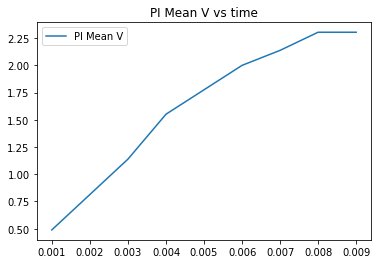

In [91]:
#plt.plot(vi_time,vi_meanv,label = 'VI Mean V')
plt.plot(pi_time,pi_meanv,label = 'PI Mean V')
# plt.plot(vi_error,label = 'VI Error')
# plt.plot(pi_error,label = 'PI Error')
plt.plot()
plt.legend(loc='best')
plt.title('PI Mean V vs time')

In [57]:
vi.policy

(0, 3, 3, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0)

In [ ]:
final_results

In [ ]:
?pi._build_run_stat

In [55]:
pi.policy

(0, 3, 3, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0)

In [ ]:
vi.policy

## ql

In [62]:
env.render()

  (Up)
SFFF
FHFH
FFFH
HFFG


(0, 3, 3, 3, 0, 0, 2, 0, 3, 1, 0, 0, 0, 2, 1, 0)
3.3320298194885254


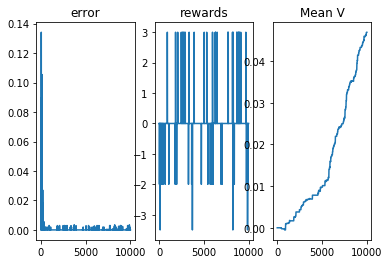

In [61]:
import time
start = time.time()
re = [10,-5,-0.5]
pp,rr = get_PR(gym_p,env,re)
n_iter = 100000
#ql = mdp.QLearning(P, R, 0.96 , n_iter=n_iter,epsilon_decay=0.999,epsilon_min=0.001,alpha_decay=0.999,alpha = 0.01)
ql = mdp.QLearning(pp, rr, 0.96 , n_iter=n_iter,epsilon_decay=0.999,epsilon_min=0.001,alpha_decay=0.999)
result = ql.run()
final_results,errors,final_rewards = vi_plot(result)
print(ql.policy)
print(time.time()-start)

(0, 3, 3, 3, 0, 0, 3, 0, 3, 1, 0, 0, 0, 2, 2, 0)
4.5657432079315186


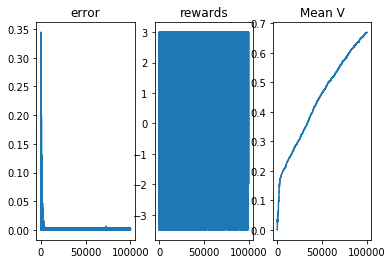

In [93]:
import time
start = time.time()
re = [10,-5,-0.5]
pp,rr = get_PR(gym_p,env,re)
n_iter = 100000
#ql = mdp.QLearning(P, R, 0.96 , n_iter=n_iter,epsilon_decay=0.999,epsilon_min=0.001,alpha_decay=0.999,alpha = 0.01)
ql = mdp.QLearning(pp, rr, 0.96 , n_iter=n_iter,epsilon_decay=0.999,epsilon_min=0.001,alpha_decay=0.999,run_stat_frequency=1)
result = ql.run_lake()
final_results,errors,final_rewards = vi_plot(result)
print(ql.policy)
print(time.time()-start)

16
(0, 3, 3, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0)
206.73770141601562


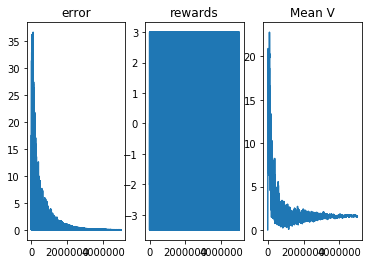

In [121]:
import time
start = time.time()
n_iter = 5000000
gamma = 0.96
ql = mdp.QLearning(pp, rr, gamma , n_iter=n_iter,
                   epsilon=1,epsilon_decay=0.9999,epsilon_min=0.1,
                   alpha_decay=0.9999,alpha = 1,alpha_min=0.01
                   ,run_stat_frequency=1,decay_every=100)
ql.setVerbose()
result = ql.run_lake()
ql_result,ql_error,ql_reward = vi_plot(result)
print(sum(ql.policy))
print(ql.policy)
print(time.time()-start)

13
(0, 3, 0, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0)
355.84751415252686


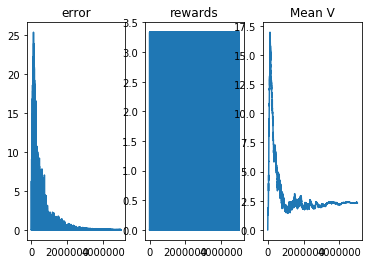

In [51]:
import time
start = time.time()
n_iter = 5000000
gamma = 0.96
ql = mdp.QLearning(pp, rr, gamma , n_iter=n_iter,
                   epsilon=1,epsilon_decay=0.9999,epsilon_min=0.1,
                   alpha_decay=0.9999,alpha = 1,alpha_min=0.01
                   ,run_stat_frequency=1,decay_every=100)
ql.setVerbose()
result = ql.run()
ql_result,ql_error,ql_reward = vi_plot(result)
print(sum(ql.policy))
print(ql.policy)
print(time.time()-start)

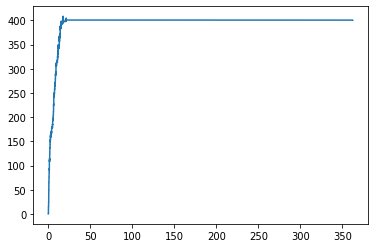

In [56]:
qltime = [i['Time'] for i in ql_result]
qlmeanv = [i['Max V'] for i in ql_result]
plt.plot(qltime,qlmeanv)

17
(3, 3, 3, 3, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0)
320.30285000801086


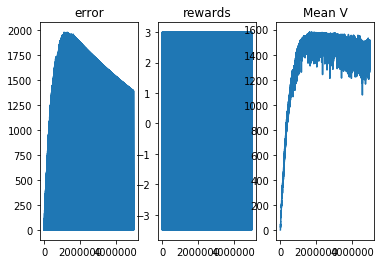

In [63]:
import time
start = time.time()
n_iter = 5000000
gamma = 0.999999996
ql = mdp.QLearning(pp, rr, gamma , n_iter=n_iter,
                   epsilon=1,epsilon_decay=0.9999,epsilon_min=0.1,
                   alpha_decay=0.9999,alpha = 1,alpha_min=0.01
                   ,run_stat_frequency=1,decay_every=1000)
ql.setVerbose()
result = ql.run_lake()
ql_result,ql_error,ql_reward = vi_plot(result)
print(sum(ql.policy))
print(ql.policy)
print(time.time()-start)

In [105]:
vi.policy

(0, 3, 3, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0)

Text(0.5, 1.0, 'Converged QL')

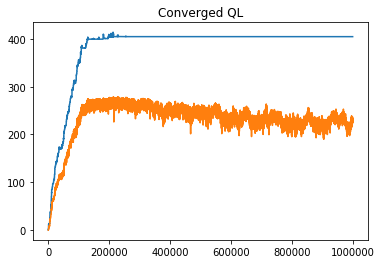

In [98]:
plt.plot([i['Max V'] for i in ql_result])
plt.plot([i['Mean V'] for i in ql_result])
plt.title('Converged QL')

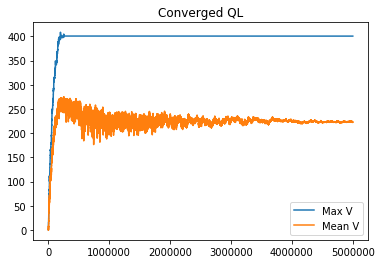

In [58]:
plt.plot([i['Max V'] for i in ql_result],label = 'Max V')
plt.plot([i['Mean V'] for i in ql_result],label = 'Mean V')
plt.title('Converged QL')
plt.legend(loc='best')

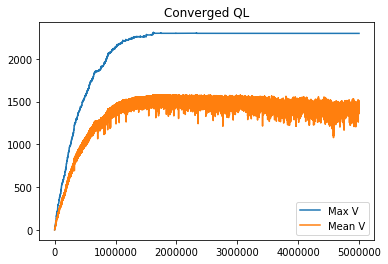

In [64]:
plt.plot([i['Max V'] for i in ql_result],label = 'Max V')
plt.plot([i['Mean V'] for i in ql_result],label = 'Mean V')
plt.title('Converged QL')
plt.legend(loc='best')

In [60]:
import pandas as pd

In [62]:
pd.DataFrame(ql_result).to_pickle('lakeresult.pkl')

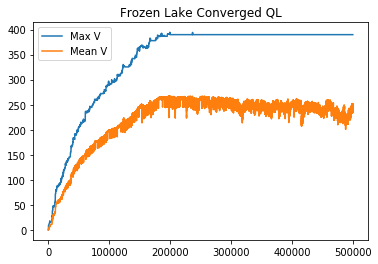

In [117]:
plt.plot([i['Max V'] for i in ql_result],label='Max V')
plt.plot([i['Mean V'] for i in ql_result],label = 'Mean V')
plt.title('Frozen Lake Converged QL')
plt.legend(loc='best') #0.999999996

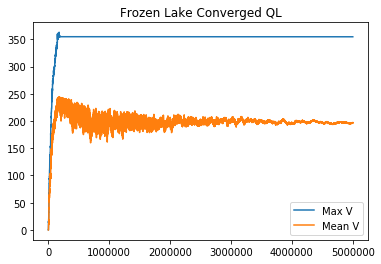

In [140]:
plt.plot([i['Max V'] for i in ql_result],label='Max V')
plt.plot([i['Mean V'] for i in ql_result],label = 'Mean V')
plt.title('Frozen Lake Converged QL')
plt.legend(loc='best') #0.999999996

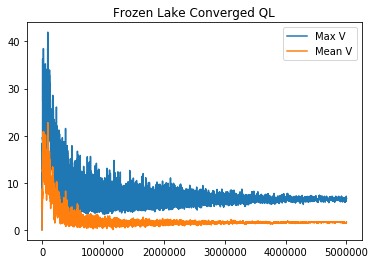

In [122]:
plt.plot([i['Max V'] for i in ql_result],label='Max V')
plt.plot([i['Mean V'] for i in ql_result],label = 'Mean V')
plt.title('Frozen Lake Converged QL')
plt.legend(loc='best')

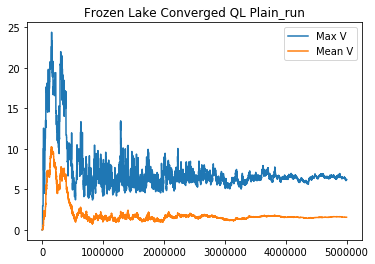

In [133]:
plt.plot([i['Max V'] for i in ql_result],label='Max V')
plt.plot([i['Mean V'] for i in ql_result],label = 'Mean V')
plt.title('Frozen Lake Converged QL Plain_run')
plt.legend(loc='best')

Text(0.5, 1.0, 'Gamma vs Iteration')

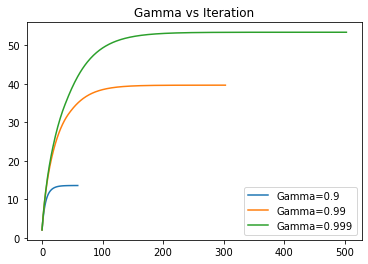

In [81]:
re = [100,-0,-0]
gamma = [0.9,0.99,0.999]
pp,rr = get_PR(gym_p,env,re)
results =[]
for g in gamma:
    vi = mdp.ValueIteration(pp,rr,g)
    result = vi.run()
    results.append([i['Mean V'] for i in result])
    plt.plot([i['Mean V'] for i in result],label='Gamma='+str(g))
#pd.DataFrame(result)
plt.legend()
plt.title('Gamma vs Iteration')

Text(0.5, 1.0, 'Gamma vs Iteration')

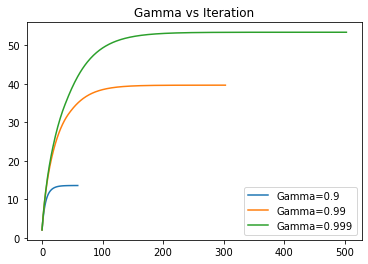

In [81]:
re = [100,-0,-0]
gamma = [0.9,0.99,0.999]
pp,rr = get_PR(gym_p,env,re)
results =[]
for g in gamma:
    vi = mdp.ValueIteration(pp,rr,g)
    result = vi.run()
    results.append([i['Mean V'] for i in result])
    plt.plot([i['Mean V'] for i in result],label='Gamma='+str(g))
#pd.DataFrame(result)
plt.legend()
plt.title('Gamma vs Iteration')

Text(0.5, 1.0, 'Gamma vs Iteration')

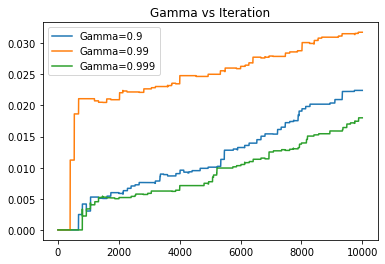

In [131]:
re = [10,-5,-0.5]
gamma = [0.9,0.99,0.999]
pp,rr = get_PR(gym_p,env,re)
results =[]
n_iter = 30000
for g in gamma:
    #vi = mdp.ValueIteration(pp,rr,g)
    ql = mdp.QLearning(pp, rr, g , n_iter=n_iter,epsilon_decay=0.999,epsilon_min=0.001,alpha_decay=0.999)

    qlresult = ql.run()
    results.append([i['Mean V'] for i in qlresult])
    plt.plot([i['Mean V'] for i in qlresult],label='Gamma='+str(g))
#pd.DataFrame(result)
plt.legend()
plt.title('Q learning Gamma vs Iteration')

Text(0.5, 1.0, 'Lake Q learning Alpha vs Iteration')

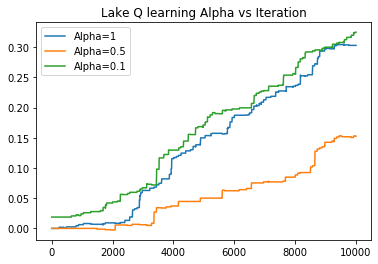

In [68]:
re = [10,-5,-0.5]
gamma = [0.9,0.99,0.999]
alpha = [1,0.5,0.1]
pp,rr = get_PR(gym_p,env,re)
results =[]
n_iter = 50000
for a in alpha:
    #vi = mdp.ValueIteration(pp,rr,g)
    ql = mdp.QLearning(pp, rr, gamma = 0.999 , n_iter=n_iter,epsilon_decay=0.999,epsilon_min=0.001,
                       alpha_decay=0.99,alpha=a,alpha_min = 0.01)

    qlresult = ql.run()
    results.append([i['Mean V'] for i in qlresult])
    plt.plot([i['Mean V'] for i in qlresult],label='Alpha='+str(a))
#pd.DataFrame(result)
plt.legend()
plt.title('Lake Q learning Alpha vs Iteration')

Text(0.5, 1.0, 'Lake Q learning Alpha vs Iteration')

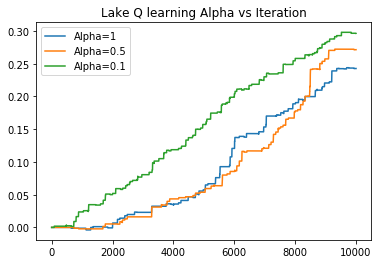

In [93]:
re = [10,-5,-0.5]
gamma = [0.9,0.99,0.999]
alpha = [1,0.5,0.1]
pp,rr = get_PR(gym_p,env,re)
results =[]
n_iter = 50000
for a in alpha:
    #vi = mdp.ValueIteration(pp,rr,g)
    ql = mdp.QLearning(pp, rr, gamma = 0.999 , n_iter=n_iter,epsilon_decay=0.999,epsilon_min=0.001,
                       alpha_decay=0.99,alpha=a,alpha_min = 0.01)

    qlresult = ql.run()
    results.append([i['Mean V'] for i in qlresult])
    plt.plot([i['Mean V'] for i in qlresult],label='Alpha='+str(a))
#pd.DataFrame(result)
plt.legend()
plt.title('Lake Q learning Alpha vs Iteration')

Text(0.5, 1.0, 'Q learning Epsilon vs Iteration')

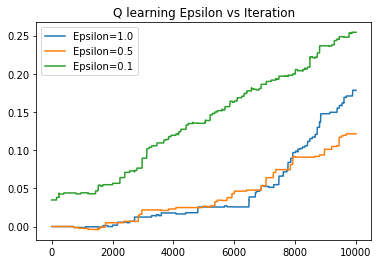

In [67]:
re = [10,-5,-0.5]
gamma = [0.9,0.99,0.999]
alpha = [1,0.5,0.1]
epsilon = [1.0,0.5,0.1]
pp,rr = get_PR(gym_p,env,re)
results =[]
n_iter = 50000
for e in epsilon:
    #vi = mdp.ValueIteration(pp,rr,g)
    ql = mdp.QLearning(pp, rr, gamma = 0.999 , n_iter=n_iter,epsilon_decay=0.999,epsilon_min=0.001,epsilon=e,
                       alpha_decay=0.99,alpha=0.1,alpha_min = 0.01)

    qlresult = ql.run()
    results.append([i['Mean V'] for i in qlresult])
    plt.plot([i['Mean V'] for i in qlresult],label='Epsilon='+str(e))
#pd.DataFrame(result)
plt.legend()
plt.title('Lake Q learning Epsilon vs Iteration')

Text(0.5, 1.0, 'Lake Q learning Epsilon vs Iteration')

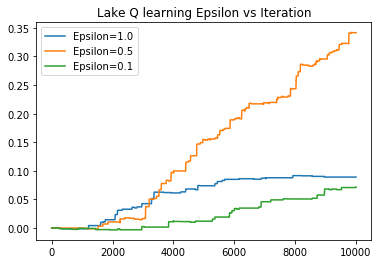

In [95]:
re = [10,-5,-0.5]
gamma = [0.9,0.99,0.999]
alpha = [1,0.5,0.1]
epsilon = [1.0,0.5,0.1]
pp,rr = get_PR(gym_p,env,re)
results =[]
n_iter = 50000
for e in epsilon:
    #vi = mdp.ValueIteration(pp,rr,g)
    ql = mdp.QLearning(pp, rr, gamma = 0.999 , n_iter=n_iter,epsilon_decay=0.999,epsilon_min=0.001,epsilon=e,
                       alpha_decay=0.99,alpha=0.1,alpha_min = 0.01)

    qlresult = ql.run()
    results.append([i['Mean V'] for i in qlresult])
    plt.plot([i['Mean V'] for i in qlresult],label='Epsilon='+str(e))
#pd.DataFrame(result)
plt.legend()
plt.title('Lake Q learning Epsilon vs Iteration')

Text(0.5, 1.0, 'Lake Q learning Epsilon Decay vs Iteration')

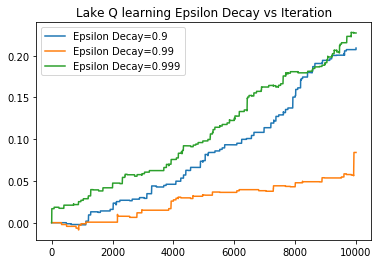

In [85]:
re = [10,-5,-0.5]
gamma = [0.9,0.99,0.999]
alpha = [1,0.5,0.1]
epsilon = [1.0,0.5,0.1]
epsilon_decay = [0.9,0.99,0.999]
pp,rr = get_PR(gym_p,env,re)
results =[]
n_iter = 50000

for e in epsilon_decay:
    #vi = mdp.ValueIteration(pp,rr,g)
    ql = mdp.QLearning(pp, rr, gamma = 0.999 , n_iter=n_iter,epsilon_decay=e,epsilon_min=0.001,epsilon=1,
                       alpha_decay=0.99,alpha=0.1,alpha_min = 0.01)

    qlresult = ql.run()
    results.append([i['Mean V'] for i in qlresult])
    plt.plot([i['Mean V'] for i in qlresult],label='Epsilon Decay='+str(e))
#pd.DataFrame(result)
plt.legend()
plt.title('Lake Q learning Epsilon Decay vs Iteration')

Text(0.5, 1.0, 'Lake Q learning Epsilon Decay vs Iteration')

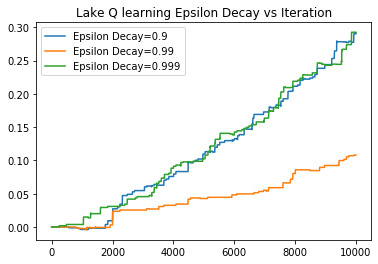

In [96]:
re = [10,-5,-0.5]
gamma = [0.9,0.99,0.999]
alpha = [1,0.5,0.1]
epsilon = [1.0,0.5,0.1]
epsilon_decay = [0.9,0.99,0.999]
pp,rr = get_PR(gym_p,env,re)
results =[]
n_iter = 50000

for e in epsilon_decay:
    #vi = mdp.ValueIteration(pp,rr,g)
    ql = mdp.QLearning(pp, rr, gamma = 0.999 , n_iter=n_iter,epsilon_decay=e,epsilon_min=0.001,epsilon=1,
                       alpha_decay=0.99,alpha=0.1,alpha_min = 0.01)

    qlresult = ql.run()
    results.append([i['Mean V'] for i in qlresult])
    plt.plot([i['Mean V'] for i in qlresult],label='Epsilon Decay='+str(e))
#pd.DataFrame(result)
plt.legend()
plt.title('Lake Q learning Epsilon Decay vs Iteration')

In [58]:
import time
start = time.time()
re = [10,-5,-0.5]
pp,rr = get_PR(gym_p,env,re)
n_iter = 1000000
#ql = mdp.QLearning(P, R, 0.96 , n_iter=n_iter,epsilon_decay=0.999,epsilon_min=0.001,alpha_decay=0.999,alpha = 0.01)
ql = mdp.QLearning(pp, rr, 0.96 , n_iter=n_iter,epsilon_decay=0.999,epsilon_min=0.001,alpha_decay=0.999,run_stat_frequency=1)

#final_results,errors,final_rewards = vi_plot(ql)
result = ql.run_lake()
print(ql.policy)
ql = mdp.QLearning(pp, rr, 0.96 , n_iter=n_iter,epsilon_decay=0.999,epsilon_min=0.001,alpha_decay=0.999,run_stat_frequency=1)
result2 = ql.run()
print(ql.policy)
print(time.time()-start)

(2, 3, 3, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 2, 0)
(1, 3, 3, 3, 0, 0, 2, 0, 3, 1, 0, 0, 0, 2, 1, 0)
78.74746656417847


In [ ]:
import time
start = time.time()
re = [10,-5,-0.5]
pp,rr = get_PR(gym_p,env,re)
n_iter = 1000000
#ql = mdp.QLearning(P, R, 0.96 , n_iter=n_iter,epsilon_decay=0.999,epsilon_min=0.001,alpha_decay=0.999,alpha = 0.01)
ql = mdp.QLearning(pp, rr, 0.96 , n_iter=n_iter,epsilon_decay=0.999,epsilon_min=0.001,alpha_decay=0.999,run_stat_frequency=1)

#final_results,errors,final_rewards = vi_plot(ql)
result = ql.run_lake()
print(ql.policy)
print(time.time()-start)

In [ ]:
_ = vi_plot(result)

In [44]:
ql.policy

(2, 3, 3, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 3, 0)

In [66]:
vi.policy

(0, 3, 3, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0)

In [67]:
pi.policy

(0, 3, 3, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0)

In [90]:

import pandas as pd

In [91]:
pd.DataFrame([i['State'] for i in result])[0].value_counts()

0     25378
1     23711
2     23219
3     22889
8       838
9       825
13      754
4       736
10      598
14      491
6       281
5        68
12       61
7        53
15       51
11       47
Name: 0, dtype: int64

In [92]:
ql.V

(0.0,
 0.0,
 0.0,
 0.0,
 0.00017079201480666535,
 0.0,
 -1.1407697242057941,
 0.0,
 0.004640814400448026,
 0.05330607227216843,
 0.08652132082529682,
 0.0,
 0.0,
 0.39131392483991917,
 1.9678027576340271,
 0.0)

In [72]:
pd.DataFrame([i['State'] for i in final_results])[0].value_counts()

15    3887
7     1220
5     1220
12     654
11     560
2      326
3      319
1      288
0      264
4      216
8      204
6      190
13     172
14     170
9      165
10     145
Name: 0, dtype: int64

In [64]:
env.render()


SFFF
FHFH
FFFH
HFFG


In [59]:
final_results[-100:]

[{'State': 15,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.7039937973022461,
  'Alpha': 0.001,
  'Epsilon': 0.001,
  'Gamma': 0.96,
  'Max V': 0.19637570543847577,
  'Mean V': 0.010676819193196515,
  'Iteration': 9901},
 {'State': 15,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.7039937973022461,
  'Alpha': 0.001,
  'Epsilon': 0.001,
  'Gamma': 0.96,
  'Max V': 0.19637570543847577,
  'Mean V': 0.010676819193196515,
  'Iteration': 9902},
 {'State': 15,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.7050278186798096,
  'Alpha': 0.001,
  'Epsilon': 0.001,
  'Gamma': 0.96,
  'Max V': 0.19637570543847577,
  'Mean V': 0.010676819193196515,
  'Iteration': 9903},
 {'State': 15,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.7050278186798096,
  'Alpha': 0.001,
  'Epsilon': 0.001,
  'Gamma': 0.96,
  'Max V': 0.19637570543847577,
  'Mean V': 0.010676819193196515,
  'Iteration': 9904},
 {'State': 15,
  'Action': 0,
  'Reward': 0.0,
  'Error'

In [649]:
rr

array([[ 0. ,  0. ,  0. ,  0. ],
       [-2. , -2. , -2. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ],
       [-2. , -2. , -2. ,  0. ],
       [ 0. , -2. , -2. , -2. ],
       [-5. , -5. , -5. , -5. ],
       [-2. , -3.5, -2. , -3.5],
       [-5. , -5. , -5. , -5. ],
       [-2. , -2. , -2. ,  0. ],
       [-2. ,  0. , -2. , -2. ],
       [ 0. , -2. , -2. , -2. ],
       [-5. , -5. , -5. , -5. ],
       [-5. , -5. , -5. , -5. ],
       [-2. , -2. ,  0. , -2. ],
       [ 0. ,  3. ,  3. ,  3. ],
       [ 0. ,  0. ,  0. ,  0. ]])

In [646]:
ql.V

(7.677872565717635e-09,
 1.768141763316233e-11,
 5.832533602752622e-14,
 2.994359527224279e-16,
 4.7042393885827195e-07,
 -46.052686543089436,
 -0.2967615863011079,
 -21.73729316427335,
 1.869347165801468e-05,
 0.0006446042385302842,
 0.006005158300099157,
 -11.139589014120029,
 -19.12918398519078,
 0.022774893485326096,
 0.600803857420898,
 0.0)

In [642]:
ql.V

(0.012829488846340026,
 0.013227496049065326,
 0.013793559946109962,
 0.014271368152377548,
 -0.08979192711765724,
 -95.76465350876305,
 -19.174272096728988,
 -92.88595796885402,
 -0.33634785937791156,
 -0.9127743589382462,
 -4.713137161903269,
 -81.02645163382665,
 -70.51643397320098,
 0.9598882604770194,
 2.335162339987272,
 0.0)

In [643]:
ql.Q

array([[ 2.62514011e-04,  3.42406030e-04,  3.11576019e-04,
         1.28294888e-02],
       [-4.59764207e-01, -4.51930930e-01, -3.64932078e-01,
         1.32274960e-02],
       [-6.73738135e-02, -3.13299523e-02, -2.80749303e-02,
         1.37935599e-02],
       [-4.67993066e-01, -4.24519194e-01, -4.54979635e-02,
         1.42713682e-02],
       [-8.97919271e-02, -5.22893119e-01, -4.81057882e-01,
        -9.97337574e-02],
       [-9.57648576e+01, -9.57646535e+01, -9.57655834e+01,
        -9.57649538e+01],
       [-1.91742721e+01, -1.92603124e+01, -1.92297279e+01,
        -1.92395415e+01],
       [-9.28869675e+01, -9.28866173e+01, -9.28867814e+01,
        -9.28859580e+01],
       [-3.66687273e-01, -3.94510571e-01, -6.69683387e-01,
        -3.36347859e-01],
       [-9.16357164e-01, -9.12774359e-01, -9.24937770e-01,
        -9.25916779e-01],
       [-4.71313716e+00, -4.78116452e+00, -4.75738783e+00,
        -4.76064946e+00],
       [-8.10264516e+01, -8.10268410e+01, -8.10278159e+01,
      

In [622]:
ql.policy

(3, 3, 3, 3, 0, 1, 0, 3, 3, 1, 0, 0, 3, 2, 3, 0)

In [620]:
vi.policy

(3, 3, 3, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0)

In [625]:
final_rewards = [i['Reward'] for i in final_results]

In [629]:
final_results[-10:]

[{'State': 13,
  'Action': 2,
  'Reward': 0.0,
  'Error': 0.0018342744525591786,
  'Time': 52.836270570755005,
  'Alpha': 0.001,
  'Epsilon': 0.001,
  'Gamma': 0.96,
  'Max V': 2.3329094847895937,
  'Mean V': -22.620496038267824,
  'Iteration': 999100},
 {'State': 1,
  'Action': 3,
  'Reward': 0.0,
  'Error': 9.212950040451574e-07,
  'Time': 52.84126019477844,
  'Alpha': 0.001,
  'Epsilon': 0.001,
  'Gamma': 0.96,
  'Max V': 2.335162339987272,
  'Mean V': -22.620063384484453,
  'Iteration': 999200},
 {'State': 11,
  'Action': 0,
  'Reward': -5.0,
  'Error': 0.0017624634092469336,
  'Time': 52.84524750709534,
  'Alpha': 0.001,
  'Epsilon': 0.001,
  'Gamma': 0.96,
  'Max V': 2.335162339987272,
  'Mean V': -22.620091069329167,
  'Iteration': 999300},
 {'State': 0,
  'Action': 3,
  'Reward': 0.0,
  'Error': 5.140706395138899e-07,
  'Time': 52.85124945640564,
  'Alpha': 0.001,
  'Epsilon': 0.001,
  'Gamma': 0.96,
  'Max V': 2.335162339987272,
  'Mean V': -22.622819244796105,
  'Iteration': 

In [599]:
pi.policy

(0, 3, 0, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0)

In [583]:
vi.R

(array([ 0., -2.,  0., -2.,  0., -5., -2., -5., -2., -2.,  0., -5., -5.,
        -2.,  0.,  0.]),
 array([ 0. , -2. ,  0. , -2. , -2. , -5. , -3.5, -5. , -2. ,  0. , -2. ,
        -5. , -5. , -2. , 33. ,  0. ]),
 array([ 0., -2.,  0., -2., -2., -5., -2., -5., -2., -2., -2., -5., -5.,
         0., 33.,  0.]),
 array([ 0. ,  0. ,  0. ,  0. , -2. , -5. , -3.5, -5. ,  0. , -2. , -2. ,
        -5. , -5. , -2. , 33. ,  0. ]))

In [582]:
pi.R

(array([ 0., -2.,  0., -2.,  0., -5., -2., -5., -2., -2.,  0., -5., -5.,
        -2.,  0.,  0.]),
 array([ 0. , -2. ,  0. , -2. , -2. , -5. , -3.5, -5. , -2. ,  0. , -2. ,
        -5. , -5. , -2. , 33. ,  0. ]),
 array([ 0., -2.,  0., -2., -2., -5., -2., -5., -2., -2., -2., -5., -5.,
         0., 33.,  0.]),
 array([ 0. ,  0. ,  0. ,  0. , -2. , -5. , -3.5, -5. ,  0. , -2. , -2. ,
        -5. , -5. , -2. , 33. ,  0. ]))

In [573]:
errors = [i['Error'] for i in final_results]

In [595]:
errors = [i['Error'] for i in final_results]

In [575]:
errors[:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.194682977764122]

In [600]:
errors[:10]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.40335281470780465,
 0.42291401663263156,
 0.3581488088031077,
 0.2938381094687863,
 0.16389365955528246]

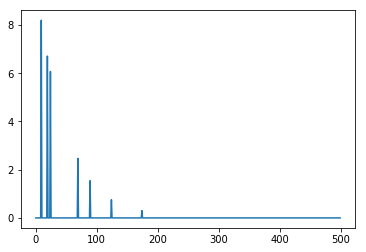

In [576]:
plt.plot(errors[:500])

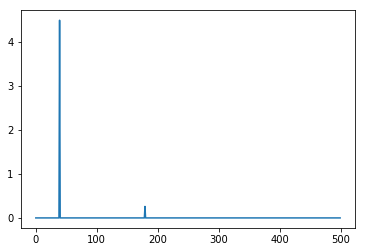

In [615]:
plt.plot(errors[:500])

In [577]:
ql.epsilon

0.001

In [458]:
pi = mdp.PolicyIteration(P, R, 0.9)
pi = mdp.PolicyIteration(pp, rr, 0.9)

pi_result = pi.run()

pi_errors = [i['Error'] for i in pi_result]

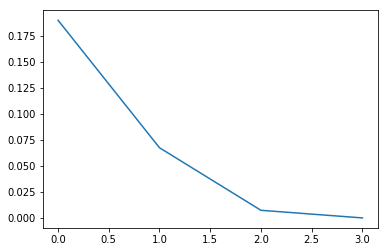

In [247]:
plt.plot(pi_errors)

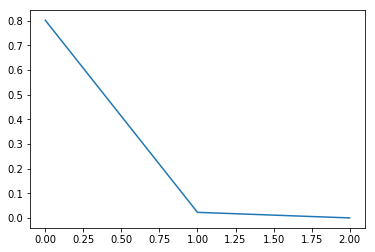

In [459]:
plt.plot(pi_errors)

In [461]:
len(pi_result)

3

In [460]:
pi.policy

(3, 3, 3, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0)

In [100]:
pi.policy

(0, 3, 0, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0)

In [248]:
pi.policy

(0, 3, 0, 3, 0, 0, 1, 0, 3, 1, 0, 0, 0, 2, 2, 0)

In [104]:
pi_result

[{'State': None,
  'Action': None,
  'Reward': 1.4285714285714288,
  'Error': 0.42857142857142855,
  'Time': 0.1148216724395752,
  'Max V': 1.4285714285714288,
  'Mean V': 0.1357357385367312,
  'Iteration': 1},
 {'State': None,
  'Action': None,
  'Reward': 1.745594869903243,
  'Error': 0.13390501051880616,
  'Time': 0.12379312515258789,
  'Max V': 1.745594869903243,
  'Mean V': 0.2706433742523482,
  'Iteration': 2},
 {'State': None,
  'Action': None,
  'Reward': 1.9033951830704754,
  'Error': 0.051918300767766934,
  'Time': 0.12479329109191895,
  'Max V': 1.9033951830704754,
  'Mean V': 0.369348202396657,
  'Iteration': 3},
 {'State': None,
  'Action': None,
  'Reward': 1.9168952315799412,
  'Error': 0.006320975600469264,
  'Time': 0.1267852783203125,
  'Max V': 1.9168952315799412,
  'Mean V': 0.4056526532358726,
  'Iteration': 4},
 {'State': None,
  'Action': None,
  'Reward': 1.9170604443558334,
  'Error': 2.220446049250313e-16,
  'Time': 0.12778663635253906,
  'Max V': 1.9170604443

In [127]:
pi.p_cumulative

[(1, array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)),
 (2, array([0, 3, 2, 3, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 2, 0], dtype=int64)),
 (3, array([1, 2, 2, 3, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0], dtype=int64)),
 (4, array([0, 3, 2, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0], dtype=int64)),
 (5, array([0, 3, 0, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0], dtype=int64))]

In [280]:
ql = mdp.QLearning(P, R, 0.96 , n_iter=200000,epsilon_decay=0.999,epsilon_min=0.001,alpha_decay=0.999)
ql_result = ql.run()

In [281]:
errors = [i['Error'] for i in ql_result]

In [307]:
re = [i['Reward'] for i in ql_result]

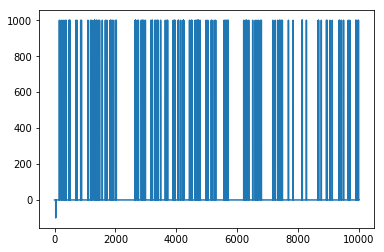

In [308]:
plt.plot(re)

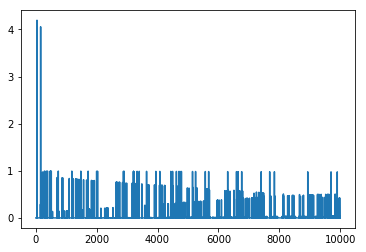

In [290]:
plt.plot(errors[:])

In [291]:
ql.policy

(0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0)

In [292]:
ql_result[-1]

{'State': 12,
 'Action': 0,
 'Reward': 0.0,
 'Error': 0.0,
 'Time': 11.534822463989258,
 'Alpha': 0.001,
 'Epsilon': 0.001,
 'Gamma': 0.96,
 'Max V': 575.1482860841471,
 'Mean V': 41.398238311888996,
 'Iteration': 200000}

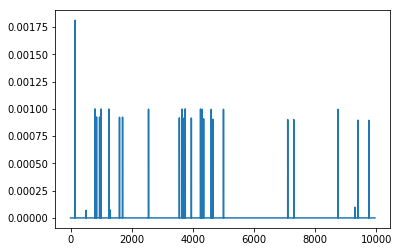

In [255]:
plt.plot(errors[50:])

In [263]:
ql.policy

(0, 2, 0, 0, 0, 0, 1, 0, 3, 2, 0, 0, 0, 1, 2, 0)

In [257]:
vi.policy

(0, 3, 0, 3, 0, 0, 1, 0, 3, 1, 0, 0, 0, 2, 2, 0)

In [264]:
ql.p_cumulative

[(20, array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)),
 (1020, array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)),
 (1220, array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)),
 (10920, array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0], dtype=int64)),
 (12520, array([0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0], dtype=int64)),
 (17740, array([0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 1, 2, 0], dtype=int64)),
 (18820, array([0, 0, 0, 0, 0, 0, 1, 0, 3, 2, 0, 0, 0, 1, 2, 0], dtype=int64)),
 (33600, array([0, 2, 0, 0, 0, 0, 1, 0, 3, 2, 0, 0, 0, 1, 2, 0], dtype=int64))]

In [141]:
ql.p_cumulative

[(2, array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)),
 (2602, array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0], dtype=int64)),
 (6802, array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0], dtype=int64)),
 (7304, array([0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0], dtype=int64)),
 (9316, array([2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0], dtype=int64)),
 (12402, array([2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 3, 0], dtype=int64)),
 (14902, array([2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 3, 3, 0], dtype=int64))]

In [608]:
ql.Q

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00, -1.35393985e-01,  0.00000000e+00,
         0.00000000e+00],
       [ 1.94057776e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 2.28421667e-04, -6.06378945e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -5.53108902e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-6.03957065e+00,  9.68654823e-01, -1.01986462e+01,
         3.35425469e-07],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00, -1.17764347e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 6.57003235e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 3.03339371e+01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
      

In [293]:
ql.Q

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 6.16537753e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 4.47789246e-04, -1.00000000e+01,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.00000000e-01,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-2.22739801e+00,  2.29042285e+00, -6.15186731e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00, -3.57335194e-01,  0.00000000e+00,
         0.00000000e+00],
       [ 1.22980462e+00,  0.00000000e+00,  0.00000000e+00,
        -1.08837371e+01],
       [ 4.23220604e+01,  0.00000000e+00, -1.59277075e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
      

In [267]:
ql.error_mean

[0.0,
 0.0,
 2e-05,
 0.0,
 0.0,
 9.998401247951362e-06,
 1.0033910339231992e-05,
 2.0035156279330514e-05,
 1.9638310413381123e-05,
 1.9971073104939558e-05,
 1.1528172272125666e-06,
 9.333817665642246e-06,
 1.0660388994677772e-05,
 1.0000732292827765e-05,
 2.8342337353204485e-05,
 9.058629165585245e-06,
 9.754504136813523e-07,
 2.889582556793498e-05,
 2.1081461985407348e-05,
 2.3875195786582675e-06,
 9.971435312135122e-06,
 9.994069125239186e-06,
 1.0037899721902716e-05,
 1.993882795402737e-05,
 2.990656474849279e-05,
 2.6629117417347965e-05,
 5.3173191124598706e-05,
 1.821104974232305e-05,
 2.0078916004699737e-05,
 2.1813958355426056e-05,
 1.7953314783956814e-05,
 3.005517216121238e-05,
 1.64431085261247e-05,
 7.907388559208162e-06,
 1.0066176274910923e-05,
 1.0060215214970096e-05,
 2.5308373244189945e-05,
 7.963317468147602e-06,
 1.2560314914508216e-05,
 1.7744641034672923e-05,
 4.766475283969504e-07,
 5.39393786951627e-06,
 1.4913394919652545e-05,
 1.2663652789248018e-05,
 2.27941763

In [294]:
ql.error_mean

[0.04195275057910024,
 0.04554723817721799,
 0.01973777918896691,
 0.021126466300621777,
 0.02118999153968176,
 0.01134748569765226,
 0.008554480700359371,
 0.01137545117685087,
 0.017023410791309656,
 0.001565751621354574,
 0.01145204645876577,
 0.009977650973313372,
 0.008356873758038941,
 0.041283010369929624,
 0.019915755391294355,
 0.009974210267904862,
 0.00813624894268914,
 0.01563489849229608,
 0.02588890217736712,
 0.01795458268759033,
 0.01002280764533783,
 0.0021096884825306307,
 0.0021616665673603046,
 0.008668965067540892,
 0.00010466548372935086,
 0.0022408640267362317,
 0.02749982606891667,
 0.015436384474562716,
 0.019740725634547013,
 0.024703215401418396,
 0.00021420817910387007,
 0.007442711017061979,
 0.02724743624082599,
 0.027010176978313247,
 0.009899500030255975,
 0.0027937267978965447,
 0.019766661666684074,
 0.007401590981237927,
 0.007080054969658175,
 0.017099944193865686,
 0.016928832021210066,
 0.012994317793989891,
 0.023948270372923776,
 0.00651962073273

In [140]:
len(ql.error_mean)

100

In [147]:
ql_result[100]

{'State': 11,
 'Action': 3,
 'Reward': 0.0,
 'Error': 0.0,
 'Time': 0.06982183456420898,
 'Alpha': 0.013263987810938228,
 'Epsilon': 0.13263987810938213,
 'Gamma': 0.96,
 'Max V': 0.0,
 'Mean V': 0.0,
 'Iteration': 202}

In [152]:
0.99**201

0.1326398781093821

In [150]:
len(ql_result)

10000

In [653]:
len(pp)

4

In [655]:
env.render()


SFFF
FHFH
FFFH
HFFG


In [676]:
for r in ql_result:
    if r['State'] > 13:
        print(r)

{'State': 14, 'Action': 0, 'Reward': 0.0, 'Error': 0.0, 'Time': 0.03390932083129883, 'Alpha': 0.08194682977764123, 'Epsilon': 0.8194682977764125, 'Gamma': 0.96, 'Max V': 0.0, 'Mean V': 0.0, 'Iteration': 200}
{'State': 15, 'Action': 0, 'Reward': 0.0, 'Error': 0.0, 'Time': 0.10471701622009277, 'Alpha': 0.040679341596116574, 'Epsilon': 0.4067934159611651, 'Gamma': 0.96, 'Max V': 67.01859060067407, 'Mean V': 4.18866191254213, 'Iteration': 900}
{'State': 15, 'Action': 0, 'Reward': 0.0, 'Error': 0.0, 'Time': 0.10571455955505371, 'Alpha': 0.03987343766111037, 'Epsilon': 0.3987343766111031, 'Gamma': 0.96, 'Max V': 67.01859060067407, 'Mean V': 4.18866191254213, 'Iteration': 920}
{'State': 15, 'Action': 0, 'Reward': 0.0, 'Error': 0.0, 'Time': 0.10671186447143555, 'Alpha': 0.039083499597894984, 'Epsilon': 0.3908349959789493, 'Gamma': 0.96, 'Max V': 67.01859060067407, 'Mean V': 4.18866191254213, 'Iteration': 940}
{'State': 15, 'Action': 0, 'Reward': 0.0, 'Error': 0.0, 'Time': 0.10770893096923828, 

In [674]:
len(pp[0])

16

In [708]:
rr

array([[ 0. ,  0. ,  0. ,  0. ],
       [-2. , -2. , -2. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ],
       [-2. , -2. , -2. ,  0. ],
       [ 0. , -2. , -2. , -2. ],
       [-5. , -5. , -5. , -5. ],
       [-2. , -3.5, -2. , -3.5],
       [-5. , -5. , -5. , -5. ],
       [-2. , -2. , -2. ,  0. ],
       [-2. ,  0. , -2. , -2. ],
       [ 0. , -2. , -2. , -2. ],
       [-5. , -5. , -5. , -5. ],
       [-5. , -5. , -5. , -5. ],
       [-2. , -2. ,  0. , -2. ],
       [ 0. , 33. , 33. , 33. ],
       [ 0. ,  0. ,  0. ,  0. ]])

In [79]:
rr.shape

(16, 4)

In [80]:
pp.shape

(4, 16, 16)